In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/Users/beatricefebrina/Downloads/NVDA-2.csv")

In [3]:
df1=df.reset_index()['Close']
df1.shape

(2516,)

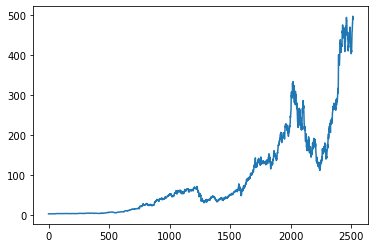

In [4]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [6]:
df1.shape

(2516, 1)

In [7]:
#spliting data into training and testing
training_size=int(len(df1)*0.70)
test_size = len(df1) - training_size
train_data,test_data = df1[:training_size,:],df1[training_size:,:]

In [8]:
def create_dataset(dataset, time_step=1):
    dataX,dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX), np.array(dataY)

In [9]:
time_step =100
X_train, Y_train = create_dataset(train_data,time_step)
X_test, Y_test = create_dataset(test_data,time_step)

In [10]:
import pandas as pd
Y_train

array([0.00167409, 0.00174004, 0.00176033, ..., 0.25150921, 0.26465842,
       0.26544476])

In [11]:
print(X_test)

[[0.26663183 0.26474469 0.26487659 ... 0.28290094 0.28458518 0.3010014 ]
 [0.26474469 0.26487659 0.26510992 ... 0.28458518 0.3010014  0.31054879]
 [0.26487659 0.26510992 0.25795701 ... 0.3010014  0.31054879 0.30238128]
 ...
 [0.8658496  0.86544374 0.84888546 ... 0.92489928 0.93746003 0.94508985]
 [0.86544374 0.84888546 0.81688499 ... 0.93746003 0.94508985 0.97319428]
 [0.84888546 0.81688499 0.84212825 ... 0.94508985 0.97319428 0.97897751]]


In [12]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [13]:
# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# initializing the RNN
regressor = Sequential()

# adding first RNN layer and dropout regulatization
regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True, 
              input_shape = (X_train.shape[1],1))
             )

regressor.add(
    Dropout(0.2)
             )

# adding second RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding third RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )


regressor.add(
    Dropout(0.2)
             )

# adding fourth RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50)
             )

regressor.add(
    Dropout(0.2)
             )


# adding the output layer
regressor.add(Dense(units = 1))

# compiling RNN
regressor.compile(
    optimizer = "adam", 
    loss = "mean_squared_error",
    metrics = ["mean_absolute_error"])

# fitting the RNN
history = regressor.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 50, batch_size = len(X_train), verbose = 1)

Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 1.4588 - mean_absolute_error: 1.0634 - val_loss: 0.0626 - val_mean_absolute_error: 0.1838
Epoch 2/50
1/1 [==============================] - 1s 827ms/step - loss: 0.4272 - mean_absolute_error: 0.5240 - val_loss: 0.6068 - val_mean_absolute_error: 0.7545
Epoch 3/50
1/1 [==============================] - 1s 905ms/step - loss: 0.6344 - mean_absolute_error: 0.6490 - val_loss: 0.9152 - val_mean_absolute_error: 0.9322
Epoch 4/50
1/1 [==============================] - 1s 1s/step - loss: 0.4997 - mean_absolute_error: 0.5701 - val_loss: 0.8732 - val_mean_absolute_error: 0.9072
Epoch 5/50
1/1 [==============================] - 1s 884ms/step - loss: 0.3893 - mean_absolute_error: 0.5017 - val_loss: 0.6707 - val_mean_absolute_error: 0.7851
Epoch 6/50
1/1 [==============================] - 1s 854ms/step - loss: 0.3474 - mean_absolute_error: 0.4710 - val_loss: 0.4828 - val_mean_absolute_error: 0.6508
Epoch 7/50
1/1 [==================

In [14]:
train_predict = regressor.predict(X_train)
test_predict = regressor.predict(X_test)

In [15]:
test_predict=scaler.inverse_transform(test_predict)
train_predict=scaler.inverse_transform(train_predict)

In [16]:
import math
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [46]:
mean_squared_error(Y_train,train_predict)  #MSE

2547.052517296261

In [47]:
mean_squared_error(Y_test,test_predict)

31547.840524790256

In [48]:
math.sqrt(mean_squared_error(Y_train,train_predict))  #RSME trainig

50.468331825970445

In [49]:
math.sqrt(mean_squared_error(Y_test,test_predict)) #RMSE test

177.617117769629

In [21]:
mean_absolute_error(Y_train,train_predict) #MAE Train

40.34518355069637

In [22]:
mean_absolute_error(Y_test,test_predict)

172.04828537243552

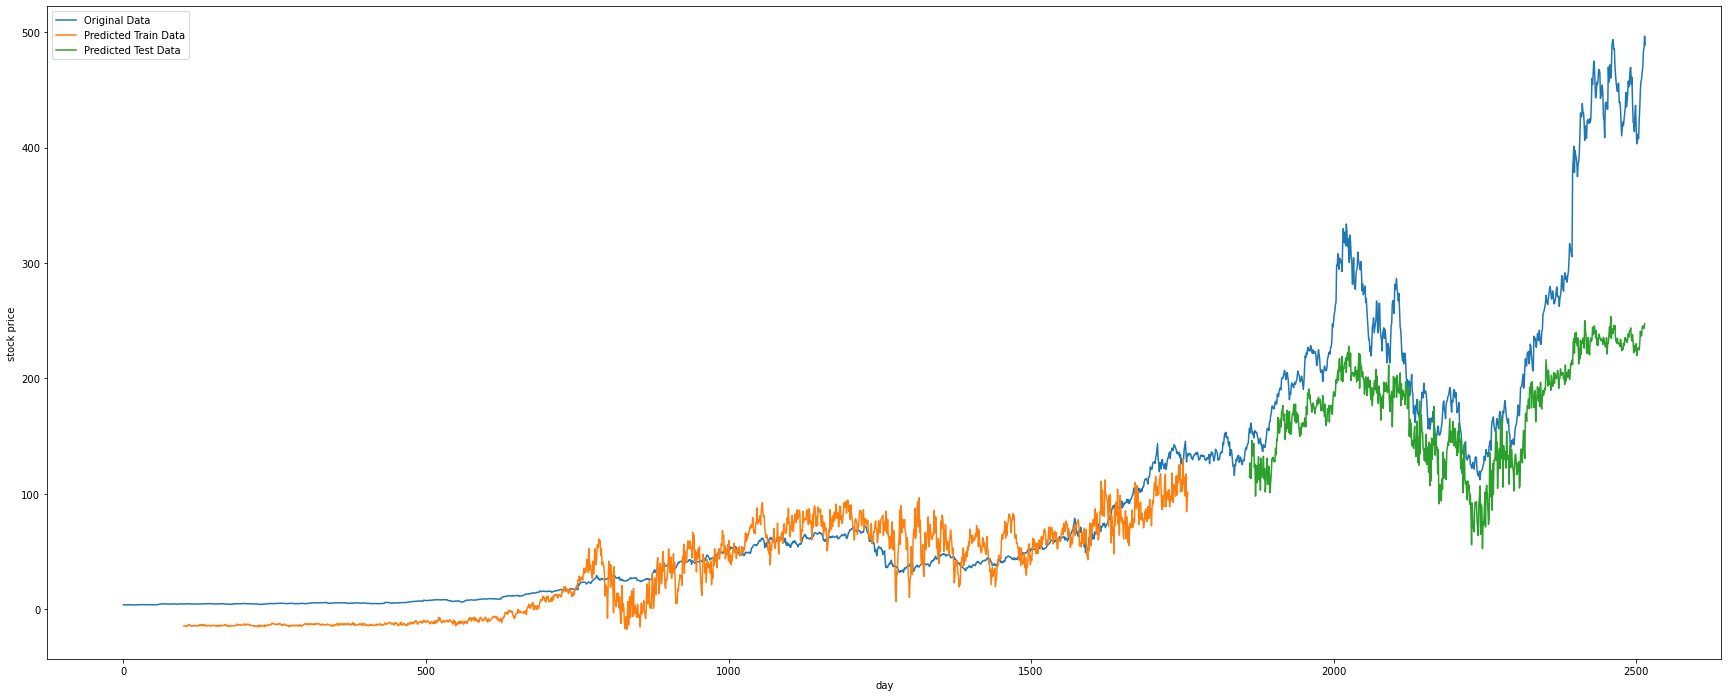

In [44]:
#plotting

lookback=100
#shift train prediction for plotting
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[lookback:len(train_predict)+lookback,:] = train_predict
#shift test prediction for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+lookback*2+1:-1,:] = test_predict
plt.subplots(figsize =(30,12))
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.xlabel('day')
plt.ylabel('stock price')
plt.legend(["Original Data","Predicted Train Data", "Predicted Test Data"])
plt.show()

In [24]:
### Create LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import tensorflow as tf

In [25]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=["mean_absolute_error"])


In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [27]:
history2 = model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=50,batch_size=len(X_train),verbose=1)

Epoch 1/50
1/1 [==============================] - 6s 6s/step - loss: 0.0081 - mean_absolute_error: 0.0652 - val_loss: 0.2032 - val_mean_absolute_error: 0.4116
Epoch 2/50
1/1 [==============================] - 1s 1s/step - loss: 0.0044 - mean_absolute_error: 0.0484 - val_loss: 0.1384 - val_mean_absolute_error: 0.3338
Epoch 3/50
1/1 [==============================] - 1s 1s/step - loss: 0.0024 - mean_absolute_error: 0.0384 - val_loss: 0.0822 - val_mean_absolute_error: 0.2488
Epoch 4/50
1/1 [==============================] - 2s 2s/step - loss: 0.0024 - mean_absolute_error: 0.0411 - val_loss: 0.0522 - val_mean_absolute_error: 0.1909
Epoch 5/50
1/1 [==============================] - 1s 1s/step - loss: 0.0030 - mean_absolute_error: 0.0491 - val_loss: 0.0461 - val_mean_absolute_error: 0.1790
Epoch 6/50
1/1 [==============================] - 1s 1s/step - loss: 0.0024 - mean_absolute_error: 0.0438 - val_loss: 0.0504 - val_mean_absolute_error: 0.1916
Epoch 7/50
1/1 [==============================

In [28]:
train_predict_L = model.predict(X_train)
test_predict_L = model.predict(X_test)

In [29]:
test_predict_L=scaler.inverse_transform(test_predict_L)
train_predict_L=scaler.inverse_transform(train_predict_L)

In [50]:
mean_squared_error(Y_train,train_predict_L)

2432.566348276441

In [51]:
mean_squared_error(Y_test,test_predict_L)

69765.54377675164

In [52]:
math.sqrt(mean_squared_error(Y_train,train_predict_L))  #RSME LSTM

49.32105380338544

In [53]:
math.sqrt(mean_squared_error(Y_test,test_predict_L)) 

264.13167885876857

In [34]:
mean_absolute_error(Y_train,train_predict_L) #MAE Train

38.60035280192703

In [35]:
mean_absolute_error(Y_test,test_predict_L)

247.78630833126678

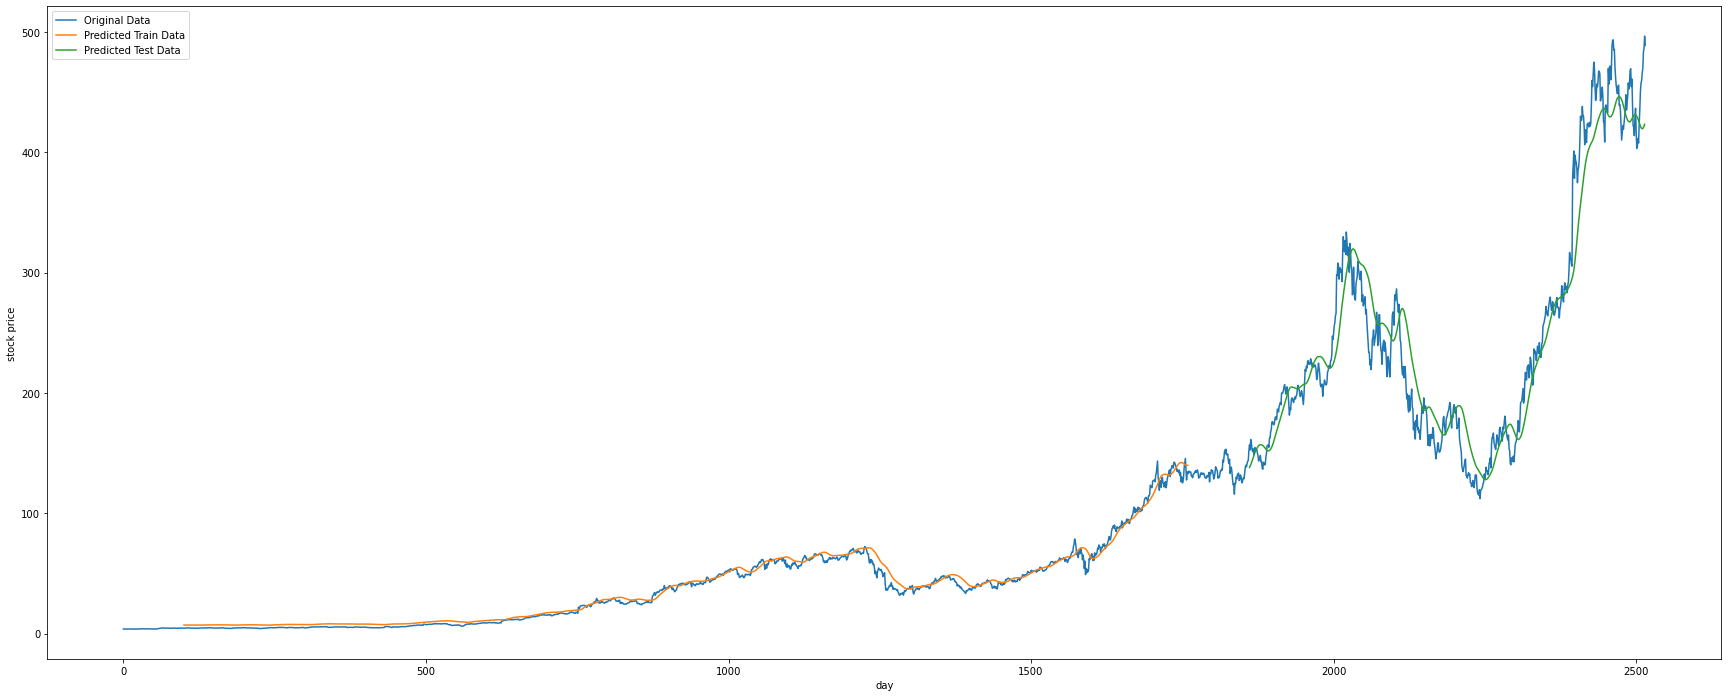

In [45]:
#plotting
lookback=100
#shift train prediction for plotting
trainPredictPlot_L = np.empty_like(df1)
trainPredictPlot_L[:,:] = np.nan
trainPredictPlot_L[lookback:len(train_predict_L)+lookback,:] = train_predict_L
#shift test prediction for plotting
testPredictPlot_L = np.empty_like(df1)
testPredictPlot_L[:,:] = np.nan
testPredictPlot_L[len(train_predict_L)+lookback*2+1:-1,:] = test_predict_L
plt.subplots(figsize =(30,12))
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot_L)
plt.plot(testPredictPlot_L)
plt.xlabel('day')
plt.ylabel('stock price')
plt.legend(["Original Data","Predicted Test Data", "Predicted Test Data"])
plt.show()

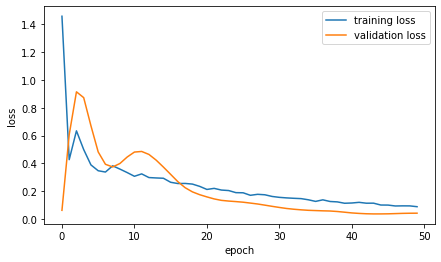

In [37]:
# loss simple RNN

plt.figure(figsize=(7,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training loss','validation loss',])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

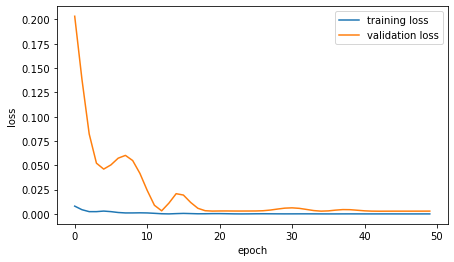

In [38]:
# loss LSTM

plt.figure(figsize=(7,4))
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.legend(['training loss','validation loss',])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

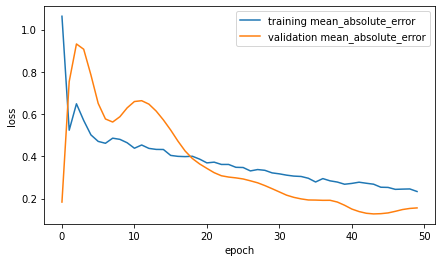

In [39]:
# mean absolute error simple RNN

plt.figure(figsize=(7,4))
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.legend(['training mean_absolute_error','validation mean_absolute_error',])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

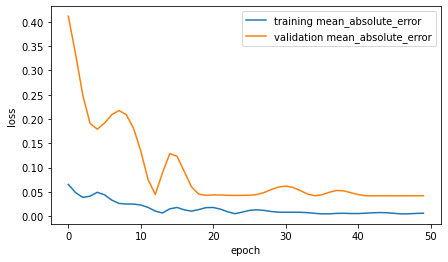

In [40]:
# mean absolute error LSTM

plt.figure(figsize=(7,4))
plt.plot(history2.history['mean_absolute_error'])
plt.plot(history2.history['val_mean_absolute_error'])
plt.legend(['training mean_absolute_error','validation mean_absolute_error',])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()